### Customer Segmentation



### Project Overview: Customer Segmentation Using Clustering

Clustering is a key unsupervised machine learning technique used to discover natural groupings within data, particularly when labels are unavailable. It plays a significant role across various scientific, engineering, and business domains, enabling deeper insights and data-driven decisions.

This project focuses on customer segmentation for a shopping mall, leveraging clustering algorithms to analyze customer behavior and identify patterns. By segmenting customers into meaningful groups, businesses can tailor their marketing strategies, optimize customer engagement, and enhance profitability.

---

### Dataset Features and Descriptions

Below are the features of the dataset, providing insights into customer credit card usage and payment behaviors:

1. **CUST_ID**: Unique identifier for each credit card holder.  
2. **BALANCE**: Monthly average balance, calculated as the daily average balance over the past 12 months.  
3. **BALANCE_FREQUENCY**: Frequency of balance updates over the last 12 months (1 = Frequently updated, 0 = Not frequently updated).  
4. **PURCHASES**: Total purchase amount spent by the customer in the last 12 months.  
5. **ONEOFF_PURCHASES**: Total amount spent on one-off purchases.  
6. **INSTALLMENTS_PURCHASES**: Total amount spent on installment-based purchases.  
7. **CASH_ADVANCE**: Total amount withdrawn through cash advances.  
8. **PURCHASES_FREQUENCY**: Frequency of purchases (1 = Frequent purchases, 0 = Rare purchases).  
9. **ONEOFF_PURCHASES_FREQUENCY**: Frequency of one-off purchases (1 = Frequent, 0 = Rare).  
10. **PURCHASES_INSTALLMENTS_FREQUENCY**: Frequency of installment-based purchases (1 = Frequent, 0 = Rare).  
11. **CASHADVANCE_FREQUENCY**: Frequency of cash advances.  
12. **CASH_ADVANCE_TRX**: Average amount per cash-advance transaction.  
13. **PURCHASES_TRX**: Average amount per purchase transaction.  
14. **CREDIT_LIMIT**: Credit limit assigned to the customer.  
15. **PAYMENTS**: Total payments made by the customer to reduce their statement balance.  
16. **MINIMUM_PAYMENTS**: Total minimum payments due during the period.  
17. **PRC_FULL_PAYMENT**: Percentage of months in which the customer paid their full statement balance.  
18. **TENURE**: Number of months the customer has held their credit card.  

---

### Objective and Value
By applying clustering to this dataset, the project aims to group customers based on their credit card usage patterns. These insights can help businesses:  
- **Personalize Offers**: Tailor marketing strategies to meet specific customer needs.  
- **Enhance Retention**: Identify high-value customers and implement retention strategies.  
- **Optimize Services**: Understand diverse customer behaviors to improve product offerings and financial services.  

This project demonstrates how unsupervised learning algorithms, such as K-means clustering, can transform raw data into actionable business intelligence.



In [4]:
# Data
import pandas as pd
import numpy as np
from scipy import stats

#Collections library for counting elements in a list
#from collections import Counter

#tqdm library for progress bars
#from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from termcolor import colored

# Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


# Train Test Split
from sklearn.model_selection import train_test_split


# scipy library for hierarchical clustering
from scipy.cluster.hierarchy import ward, dendrogram, linkage
from scipy.cluster import hierarchy





# sklearn library
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Scaling
from sklearn.preprocessing import StandardScaler

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Customer_Data.csv')

In [6]:
df = pd.DataFrame(data)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [8]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,CUST_ID,object,8950,0
1,BALANCE,float64,8871,0
2,BALANCE_FREQUENCY,float64,43,0
3,PURCHASES,float64,6203,0
4,ONEOFF_PURCHASES,float64,4014,0
5,INSTALLMENTS_PURCHASES,float64,4452,0
6,CASH_ADVANCE,float64,4323,0
7,PURCHASES_FREQUENCY,float64,47,0
8,ONEOFF_PURCHASES_FREQUENCY,float64,47,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0


Data Cleaning

In [9]:
# Check the Null value for 'Credit Limit'
null = df[df['CREDIT_LIMIT'].isnull()]
null

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [10]:
# Drop the missing value for 'Credit Limit'
df = df.drop(5203)
df = df.reset_index(drop=True)
df.shape

(8949, 18)

In [11]:
# Check the Null value for 'MINIMUM_PAYMENTS'
df[['MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,MINIMUM_PAYMENTS
3,NaN
45,NaN
47,NaN
54,NaN
55,NaN
...,...
8918,NaN
8928,NaN
8934,NaN
8943,NaN


In [12]:
# Fill missing values in the 'MINIMUM_PAYMENTS' column with the median value
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df.shape

(8949, 18)

In [13]:
# Drop CUST_ID column
df.drop(['CUST_ID'], axis=1, inplace=True)
df.shape

(8949, 17)

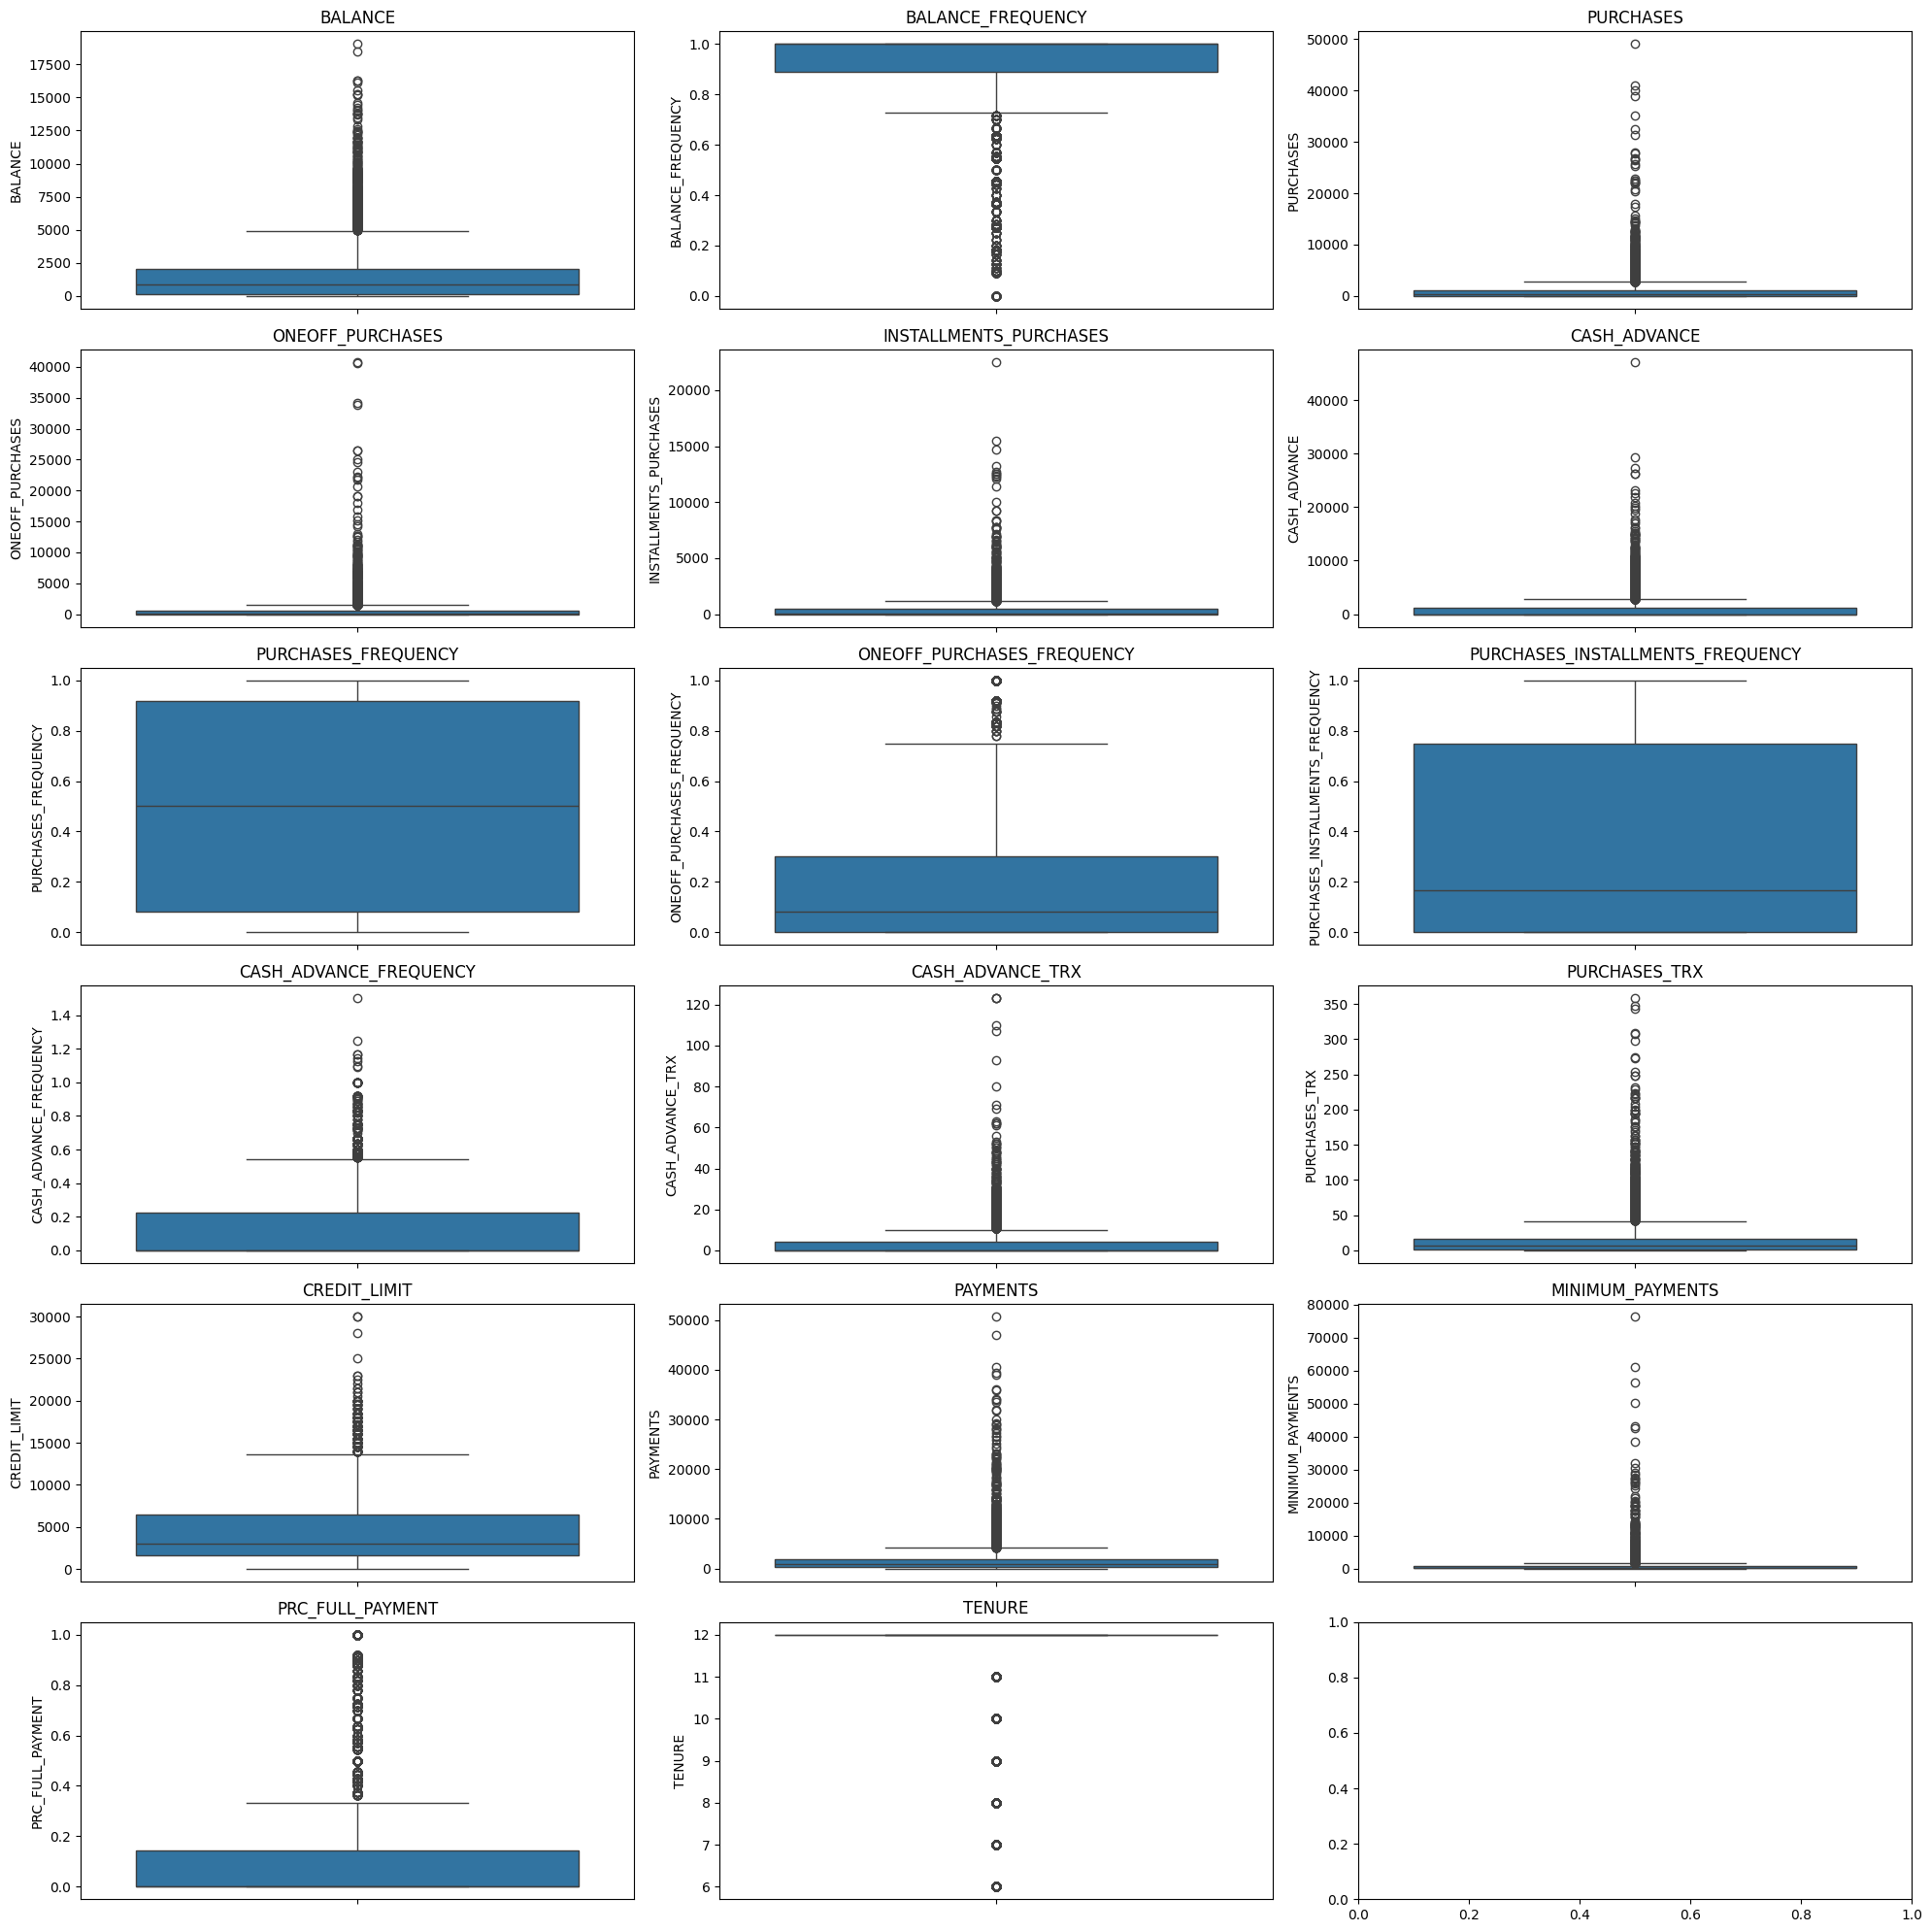

In [14]:
fig= plt.subplots(nrows=6 , ncols=3 , figsize=(20,20))
for i in range (len(df.columns)):
    plt.subplot(6,3,i+1)
    ax= sns.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
    plt.tight_layout()
plt.show()

This visualization consists of box plots for various features of the dataset. Each subplot shows the distribution of a particular variable, highlighting key statistical information like median, quartiles, and potential outliers. Below is a detailed explanation of the insights these box plots reveal:

---

### General Insights from the Box Plots:
1. **Median (Central Line in the Box)**:
   - The central horizontal line in each box represents the median value for the feature.
   - This gives an idea of the central tendency of the data.

2. **Interquartile Range (IQR)**:
   - The height of the box represents the IQR, which is the range between the 25th percentile (lower quartile) and the 75th percentile (upper quartile).
   - This indicates the spread of the majority of the data points.

3. **Whiskers**:
   - The whiskers extend to the data points that are within 1.5 times the IQR from the box edges.
   - Values beyond these whiskers are considered **outliers**.

4. **Outliers (Dots Beyond Whiskers)**:
   - These are extreme values that lie significantly outside the range of most of the data.
   - Outliers can represent unique cases or data errors and may require special handling depending on the context.

---

### Feature-Specific Observations:

1. **BALANCE**:
   - Most customers have low monthly balances, but there are significant outliers with balances as high as 17,500.
   - The median is close to zero, suggesting that many customers keep their balances minimal.

2. **BALANCE_FREQUENCY**:
   - Values cluster close to 1, indicating that most customers frequently update their balances.
   - There are no major outliers in this feature.

3. **PURCHASES**:
   - Total purchase amounts are generally low for most customers, but there are some extreme outliers with values exceeding 40,000.
   - The box is tightly packed, reflecting a majority of customers with minimal spending.

4. **ONEOFF_PURCHASES**:
   - Similar to `PURCHASES`, the majority of customers have low one-off purchases, while a few have significantly high values.

5. **INSTALLMENTS_PURCHASES**:
   - Most installment purchases are minimal, but some customers exhibit high outlier values.
   - The median is much lower than the upper range of the outliers.

6. **CASH_ADVANCE**:
   - Cash advances are mostly low, but some customers utilize significant amounts, as seen in the outliers.

7. **PURCHASES_FREQUENCY**:
   - This is mostly skewed towards 1, indicating frequent purchasing behavior among many customers.
   - There are minimal outliers.

8. **ONEOFF_PURCHASES_FREQUENCY**:
   - A significant portion of customers exhibit infrequent one-off purchases, but there are cases where this behavior is frequent.

9. **PURCHASES_INSTALLMENTS_FREQUENCY**:
   - Installment-based purchases are common, with many customers scoring close to 1, indicating frequent usage.

10. **CASHADVANCE_FREQUENCY**:
    - Cash advances are generally infrequent, but there are outliers representing customers who rely heavily on this feature.

11. **CASH_ADVANCE_TRX**:
    - Most customers have low average cash advance transaction amounts, but the outliers suggest significant usage among a few customers.

12. **PURCHASES_TRX**:
    - Similar to other purchase-related features, most customers have low values, with a few significant outliers.

13. **CREDIT_LIMIT**:
    - Credit limits vary widely among customers, with some having significantly higher limits, as shown by the outliers.
    - The median and IQR indicate most customers have moderate credit limits.

14. **PAYMENTS**:
    - Total payments are mostly concentrated around low values, but a few customers exhibit very high payment amounts.

15. **MINIMUM_PAYMENTS**:
    - Most customers pay close to the minimum amount, but some make much higher minimum payments, as reflected by the outliers.

16. **PRC_FULL_PAYMENT**:
    - The percentage of full payments is clustered near zero for many customers, indicating that full payment behavior is rare.
    - There are no extreme outliers.

17. **TENURE**:
    - Most customers have tenure values tightly clustered around 12 months, suggesting stable long-term customer relationships.

---

### Key Takeaways:
- **Outliers**: Many features exhibit significant outliers, such as `BALANCE`, `PURCHASES`, and `CASH_ADVANCE`. These outliers may represent high-value customers or anomalous behavior.
- **Customer Behavior**: Features like `PURCHASES_FREQUENCY` and `BALANCE_FREQUENCY` suggest that many customers actively engage in financial transactions.
- **Skewness**: Several features, such as `BALANCE` and `CASH_ADVANCE`, are heavily skewed, with most customers exhibiting low values and a few showing high values.

These box plots provide a comprehensive overview of the dataset's distribution and help identify patterns, potential anomalies, and areas requiring preprocessing before clustering.

In [15]:
# Calculate the IQR for each column in the dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,695,1492,808,1013,867,1030,0,782,0,525,804,766,248,808,909,1474,1365


In [16]:
outlier_counts = {}

for col in df.columns:
    outliers = df[stats.zscore(df[col]) > 3][col]
    outlier_counts[col] = outliers.count()

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df.T


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Outlier Count,196,0,135,122,137,182,0,0,0,199,172,185,152,159,102,0,0
